# TIME SERIES ANALYSIS OF US CARRIER TRAFFIC 

Task
1.How the data changes from month to month and year to year?

-Any trend?

-How fluctuated the curve is?

-Any seasonal effects?

-Any unusual years/months which have significantly small or large number?

2.Forecast future value (for next 12 months)?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import datetime

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%b-%y')

In [3]:
time = pd.read_csv("USCarrier_Traffic_20200915072556.csv",
                   parse_dates=['Period'], index_col='Period',
                   date_parser=dateparse)
time.head()

,Total
Period,
2000-01-01,49045412
2000-02-01,49306303
2000-03-01,60443541
2000-04-01,58286680
2000-05-01,60533783


In [4]:
time1 = time['Total']
time1.head()

Period
2000-01-01    49045412
2000-02-01    49306303
2000-03-01    60443541
2000-04-01    58286680
2000-05-01    60533783
Name: Total, dtype: int64

Plotting TS Graph 

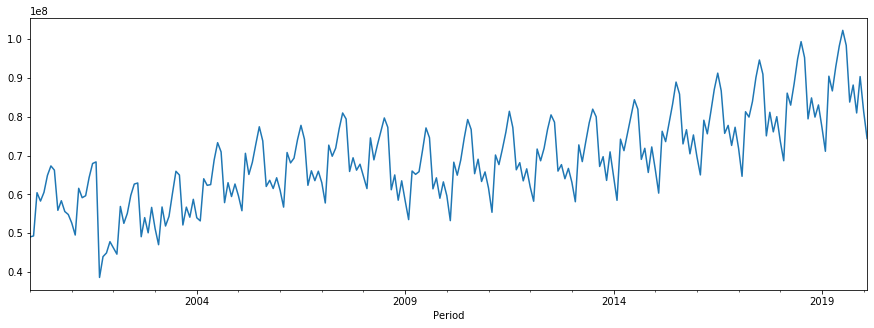

In [5]:
time1.plot(kind="line",figsize=(15,5))
plt.show()

# Decompositon of Time Series

Additive Decomposition

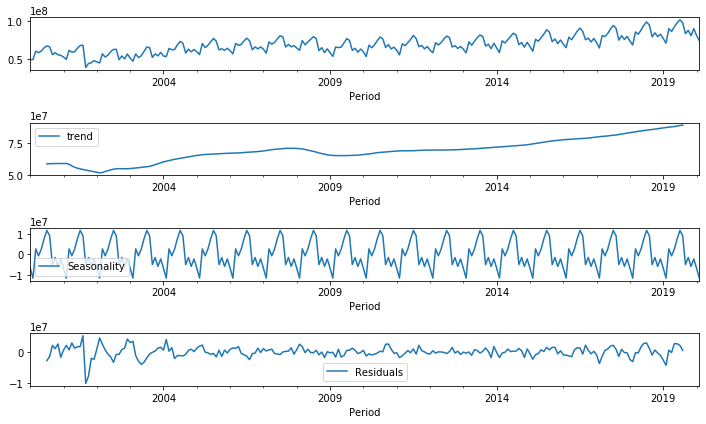

In [6]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time1,model='additive', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time1.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Multiplicative Decomposition

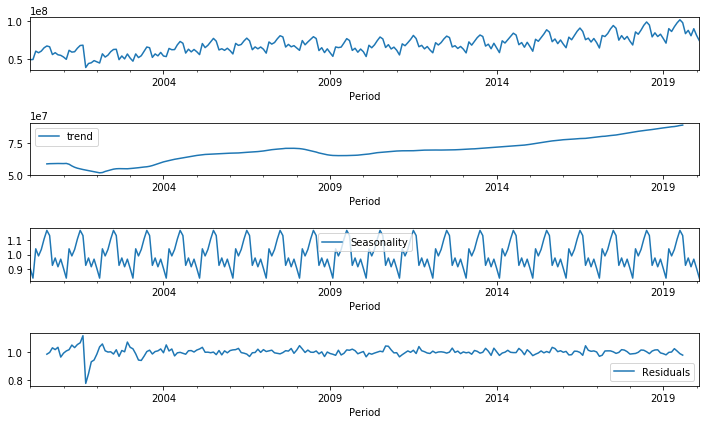

In [7]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time1,model='multiplicative', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time1.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

We can conclude from the decomposition that our TS data countains trend as well as sesonality with residuals.
Hence we will go for Holt Winters exponential smoothing

### Splitting into Train and Testing

In [8]:
train=time1[0:219] 
test=time1[219:]

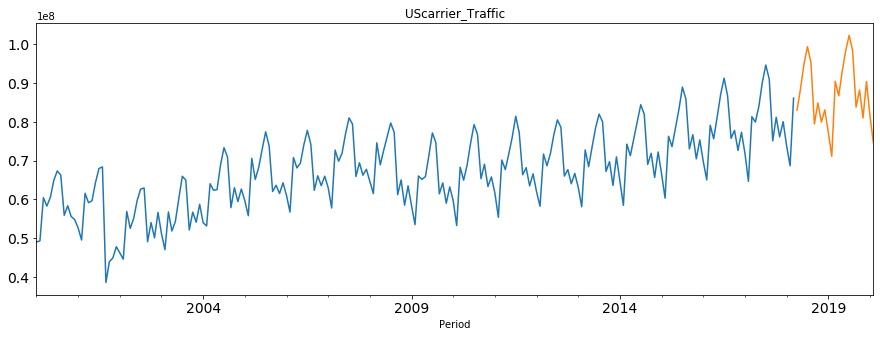

In [9]:
train.plot(figsize=(15,5), title= 'UScarrier_Traffic', fontsize=14)
test.plot(figsize=(15,5), title= 'UScarrier_Traffic', fontsize=14)
plt.show()

## Holt-Winter Exponential Smoothing

In [10]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Multiplicative smoothing

In [11]:
hwes = ExponentialSmoothing(train , seasonal_periods=12 ,trend='multiplicative', seasonal="multiplicative").fit()
hwes.summary()

C:\Users\parva\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,219
Model:,ExponentialSmoothing,SSE,692473195451749.875
Optimized:,True,AIC,6335.306
Trend:,Multiplicative,BIC,6389.531
Seasonal:,Multiplicative,AICC,6338.726
Seasonal Periods:,12,Date:,"Wed, 23 Sep 2020"
Box-Cox:,False,Time:,02:19:27
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6039380,alpha,True
smoothing_slope,2.674e-27,beta,True


In [12]:
hwes1 = hwes.forecast(24)
#print(hwes1)

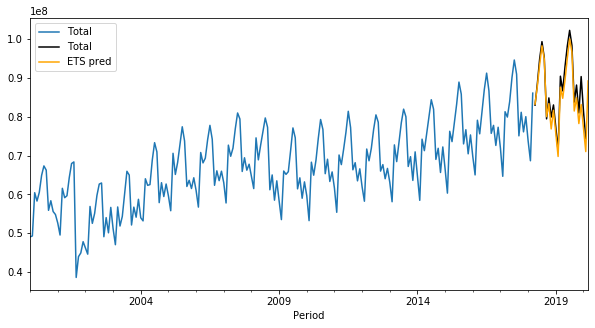

In [13]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [14]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Addtive Smoothing

In [15]:
hwes = ExponentialSmoothing(train , seasonal_periods=12 ,trend='add', seasonal="additive").fit()
hwes.summary()

C:\Users\parva\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,219
Model:,ExponentialSmoothing,SSE,3227120270143338.500
Optimized:,True,AIC,6672.364
Trend:,Additive,BIC,6726.589
Seasonal:,Additive,AICC,6675.784
Seasonal Periods:,12,Date:,"Wed, 23 Sep 2020"
Box-Cox:,False,Time:,02:19:27
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.000000,alpha,True
smoothing_slope,0.000000,beta,True


In [16]:
hwes1 = hwes.forecast(24)
#print(hwes1)

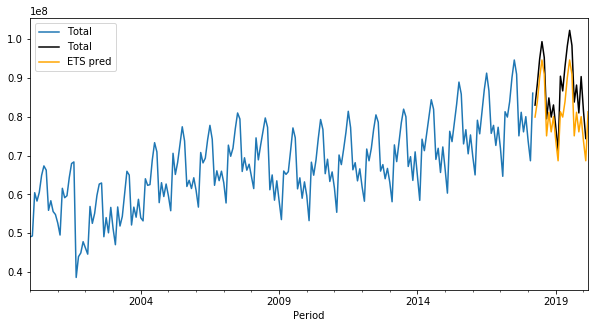

In [17]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

#### From the above results we can conclude that we are getting better results on multiplicative Holts Winters exponential smoothing.Also the AIC score of Multiplicative model is low .


#### Hence we can go for unseen prediction for next 12 Months using both additve and multiplicative smoothing.

In [18]:
hwes = ExponentialSmoothing(time1, seasonal_periods=12 ,trend='add', seasonal="additive").fit()
hwes.summary()

C:\Users\parva\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,242
Model:,ExponentialSmoothing,SSE,977455647614024.875
Optimized:,True,AIC,7056.543
Trend:,Additive,BIC,7112.366
Seasonal:,Additive,AICC,7059.610
Seasonal Periods:,12,Date:,"Wed, 23 Sep 2020"
Box-Cox:,False,Time:,02:19:28
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4736842,alpha,True
smoothing_slope,0.0526316,beta,True


In [19]:
hwes1 = hwes.forecast(12)
print(hwes1)

2020-03-01    9.330565e+07
2020-04-01    8.994189e+07
2020-05-01    9.529214e+07
2020-06-01    1.005682e+08
2020-07-01    1.045133e+08
2020-08-01    1.004965e+08
2020-09-01    8.615279e+07
2020-10-01    9.092163e+07
2020-11-01    8.499696e+07
2020-12-01    9.094789e+07
2021-01-01    8.373501e+07
2021-02-01    7.865592e+07
Freq: MS, dtype: float64


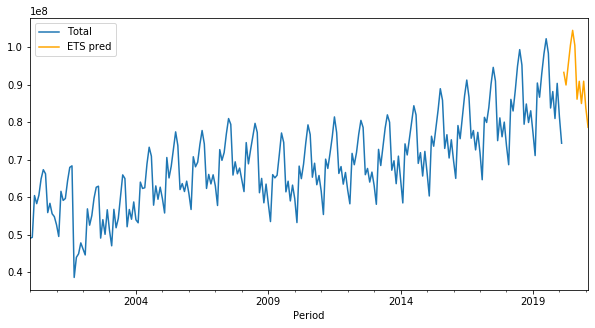

In [20]:
time1.plot(kind="line",figsize=(10,5),legend=True)
hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [21]:
hwes = ExponentialSmoothing(time1, seasonal_periods=12 ,trend='multiplicative', seasonal="multiplicative").fit()
hwes.summary()

C:\Users\parva\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,242
Model:,ExponentialSmoothing,SSE,733727572569583.000
Optimized:,True,AIC,6987.134
Trend:,Multiplicative,BIC,7042.957
Seasonal:,Multiplicative,AICC,6990.201
Seasonal Periods:,12,Date:,"Wed, 23 Sep 2020"
Box-Cox:,False,Time:,02:19:28
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5831741,alpha,True
smoothing_slope,1.4515e-22,beta,True


In [22]:
hwes1 = hwes.forecast(12)
#print(hwes1)

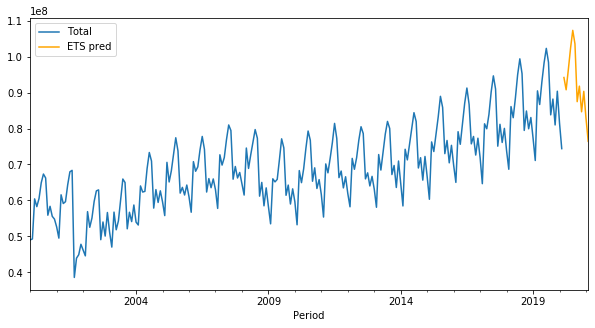

In [23]:
time1.plot(kind="line",figsize=(10,5),legend=True)
hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

## We can also train our TS data using ARIMA method 

Checking staionarity

In [24]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
    #Determing rolling statistics
    rolmean=pd.core.window.Rolling(timeseries, window=12).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=12).std()



    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

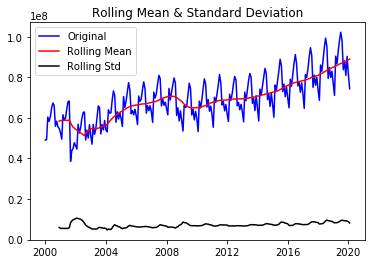

Results of Dickey-Fuller Test:
Test Statistic                   0.223770
p-value                          0.973564
#Lags Used                      13.000000
Number of Observations Used    228.000000
Critical Value (1%)             -3.459361
Critical Value (5%)             -2.874302
Critical Value (10%)            -2.573571
dtype: float64


In [25]:
test_stationarity(time1)

In [26]:
diff1=train.diff()
diff1=diff1.dropna()

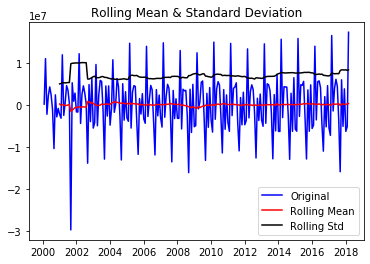

Results of Dickey-Fuller Test:
Test Statistic                  -3.759087
p-value                          0.003355
#Lags Used                      12.000000
Number of Observations Used    205.000000
Critical Value (1%)             -3.462658
Critical Value (5%)             -2.875744
Critical Value (10%)            -2.574341
dtype: float64


In [27]:
test_stationarity(diff1)

We have acchieved the required p value to reject our null hypothesis

In [28]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

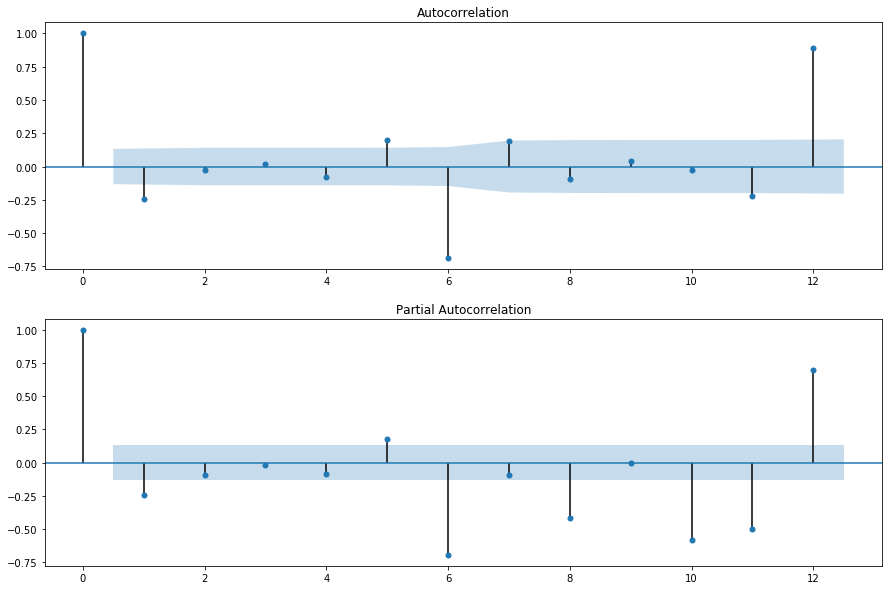

In [29]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff1, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diff1, ax=pyplot.gca(),lags=12)
pyplot.show()

#### From the above results we can conclude that the best values of p ,d ,q would be 1 and hence ,order for training our ARIMA model would be (1,1,1) 

In [30]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [31]:
model = sm.tsa.SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,3,12))

C:\Users\parva\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [32]:
model_fit=model.fit(disp=True)
print(model_fit.summary())


                                 Statespace Model Results                                 
Dep. Variable:                              Total   No. Observations:                  219
Model:             SARIMAX(1, 1, 1)x(1, 1, 3, 12)   Log Likelihood               -3311.737
Date:                            Wed, 23 Sep 2020   AIC                           6637.474
Time:                                    02:19:36   BIC                           6660.770
Sample:                                01-01-2000   HQIC                          6646.896
                                     - 03-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3552      0.609      0.583      0.560      -0.839       1.550
ma.L1         -0.4284      0.602   

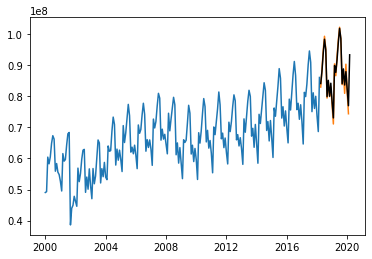

In [33]:
forecast = model_fit.forecast(steps=24)
#print(forecast)

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

Model is showing good result on the train data ,hence we can for the further 12 prediction

In [34]:
model = sm.tsa.SARIMAX(time1, order=(1,1,1), seasonal_order=(1,1,3,12))

C:\Users\parva\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [35]:
model_fit=model.fit(disp=True)
print(model_fit.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Total   No. Observations:                  242
Model:             SARIMAX(1, 1, 1)x(1, 1, 3, 12)   Log Likelihood               -3675.538
Date:                            Wed, 23 Sep 2020   AIC                           7365.076
Time:                                    02:19:42   BIC                           7389.112
Sample:                                01-01-2000   HQIC                          7374.773
                                     - 02-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3278      0.529      0.620      0.536      -0.709       1.365
ma.L1         -0.4112      0.522   

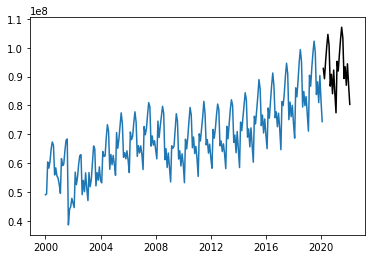

In [36]:
forecast = model_fit.forecast(steps=24)
#print(forecast)

#plot the predictions for validation set
plt.plot(time1)
plt.plot(forecast, label='Prediction', color='black')
plt.show()